In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import warnings;warnings.filterwarnings("ignore")

In [64]:
bank_churn = pd.read_csv('bank churn.csv', index_col='id')

In [65]:
bank_churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [66]:
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


In [67]:
bank_churn.shape

(165034, 13)

In [68]:
bank_churn.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [69]:
for i in  ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']:
    print(bank_churn[i].value_counts())
    print(' ')
    print('**' * 10)

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64
 
********************
Gender
Male      93150
Female    71884
Name: count, dtype: int64
 
********************
Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64
 
********************
NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64
 
********************
HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64
 
********************
IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64
 
********************
Exited
0    130113
1     34921
Name: count, dtype: int64
 
********************


In [70]:
#desc = pd.DataFrame(index=list(bank_churn))
#desc['type'] = bank_churn.dtypes
#desc['count'] = bank_churn.count()
#desc['nunique'] = bank_churn.nunique()
#desc['%unique'] = desc['nunique'] / len(bank_churn) * 100
#desc['null'] = bank_churn.isnull().sum()
#desc['%null'] = desc['null'] / len(bank_churn) * 100
#desc['min'] = bank_churn.min()
#desc['max'] = bank_churn.max()
#desc

In [71]:
bank_churn.describe(include=np.number)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [72]:
bank_churn.describe(include=object)

,Surname,Geography,Gender
count,165034,165034,165034
unique,2797,3,2
top,Hsia,France,Male
freq,2456,94215,93150


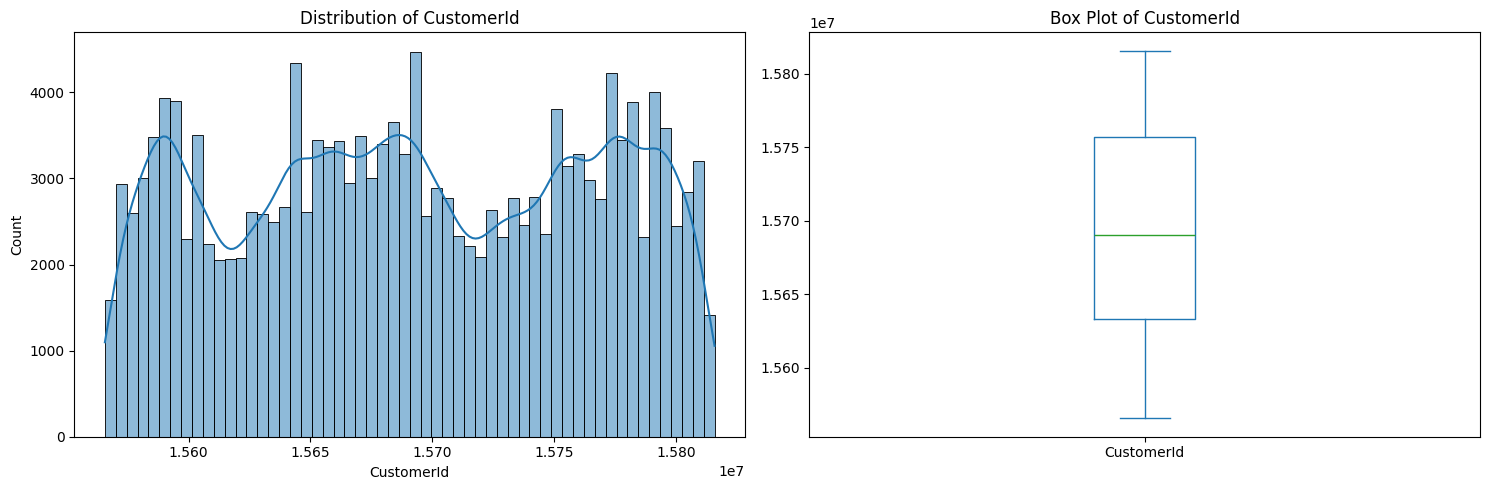

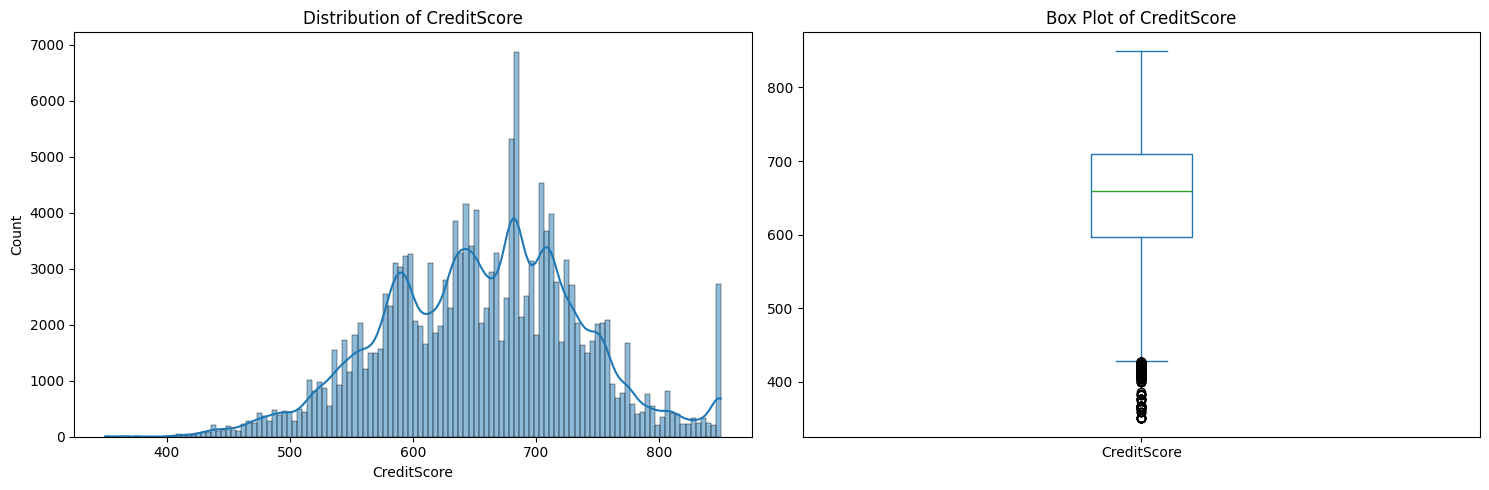

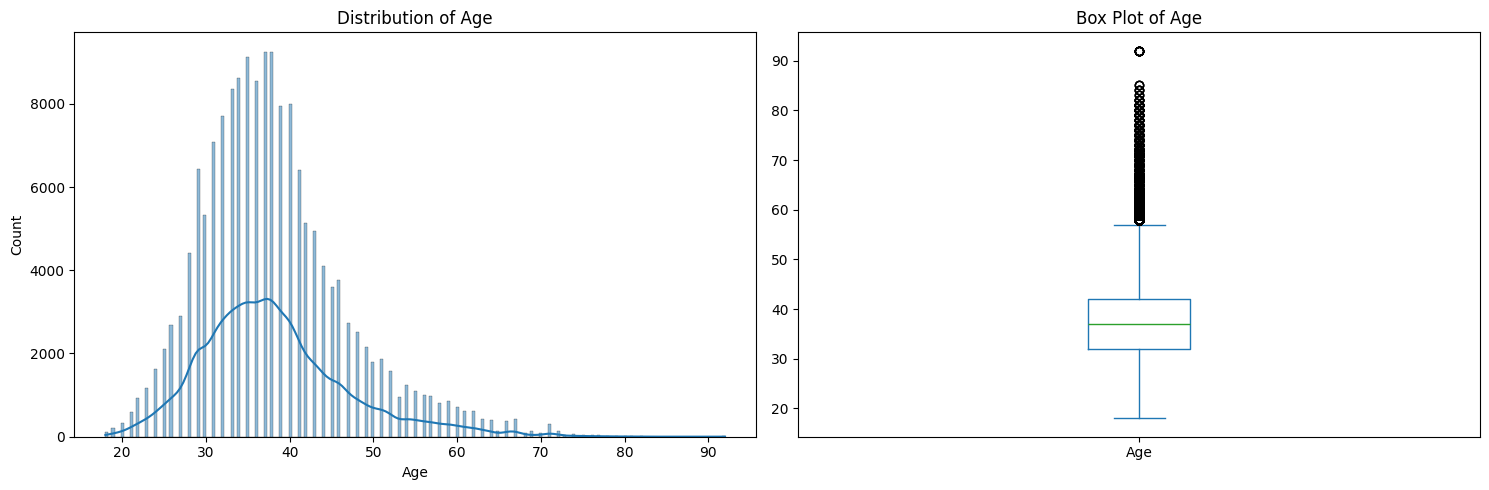

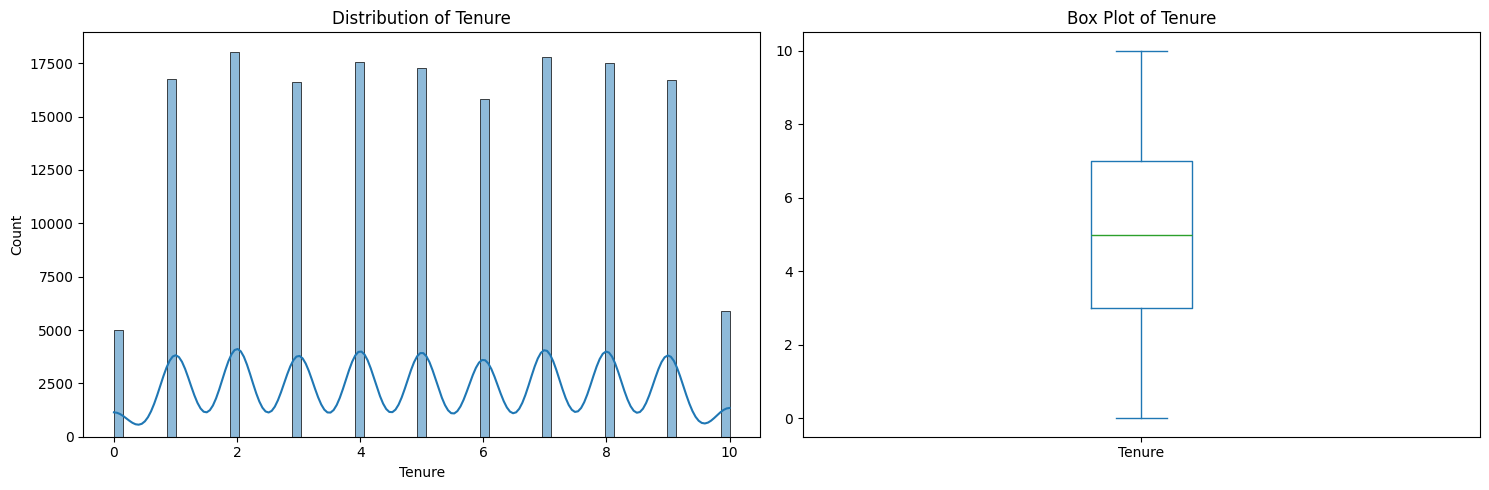

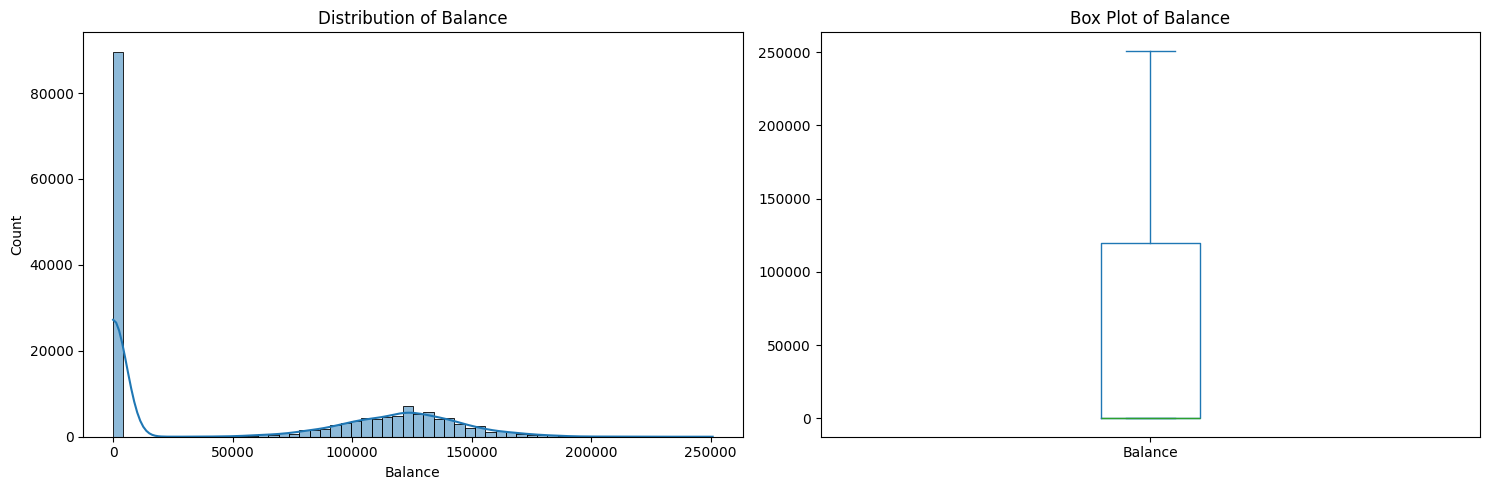

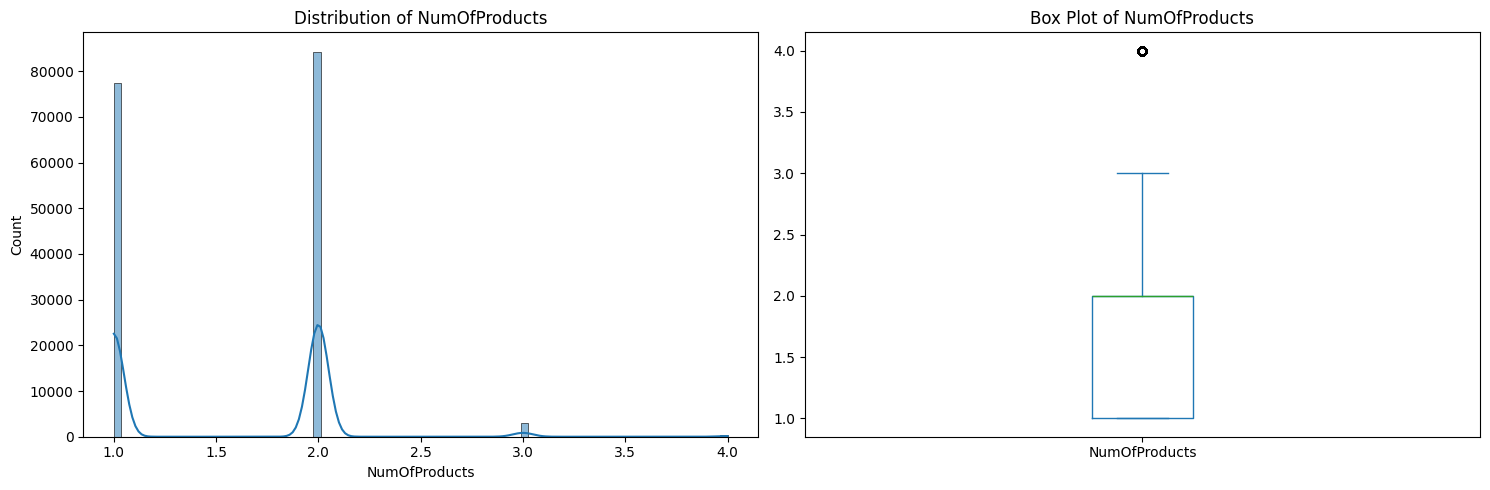

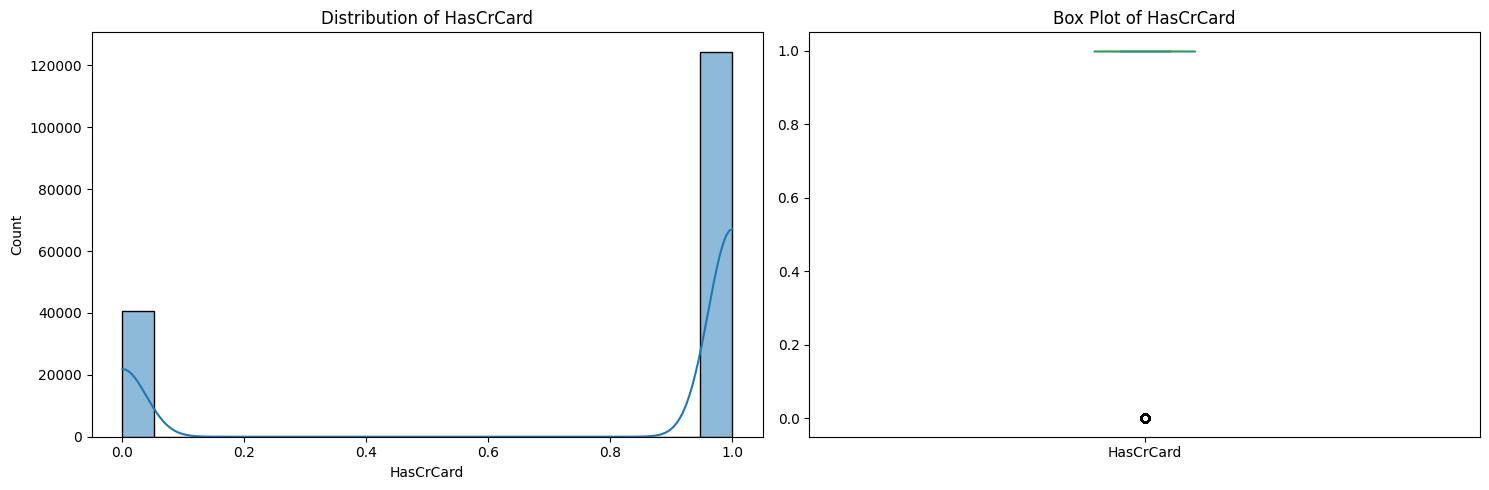

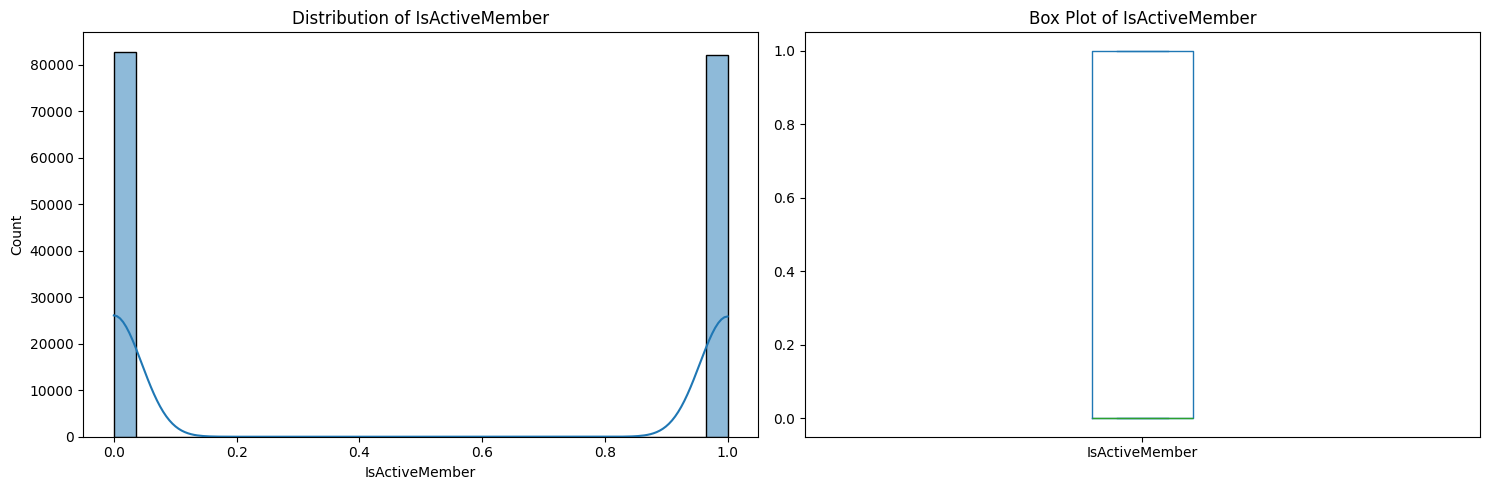

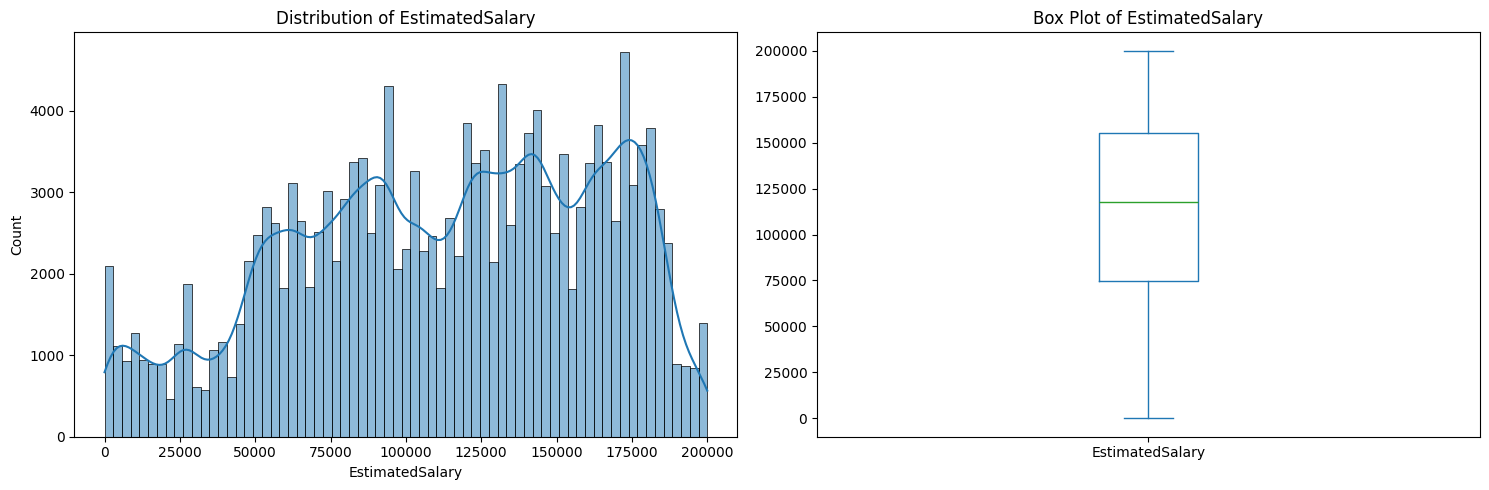

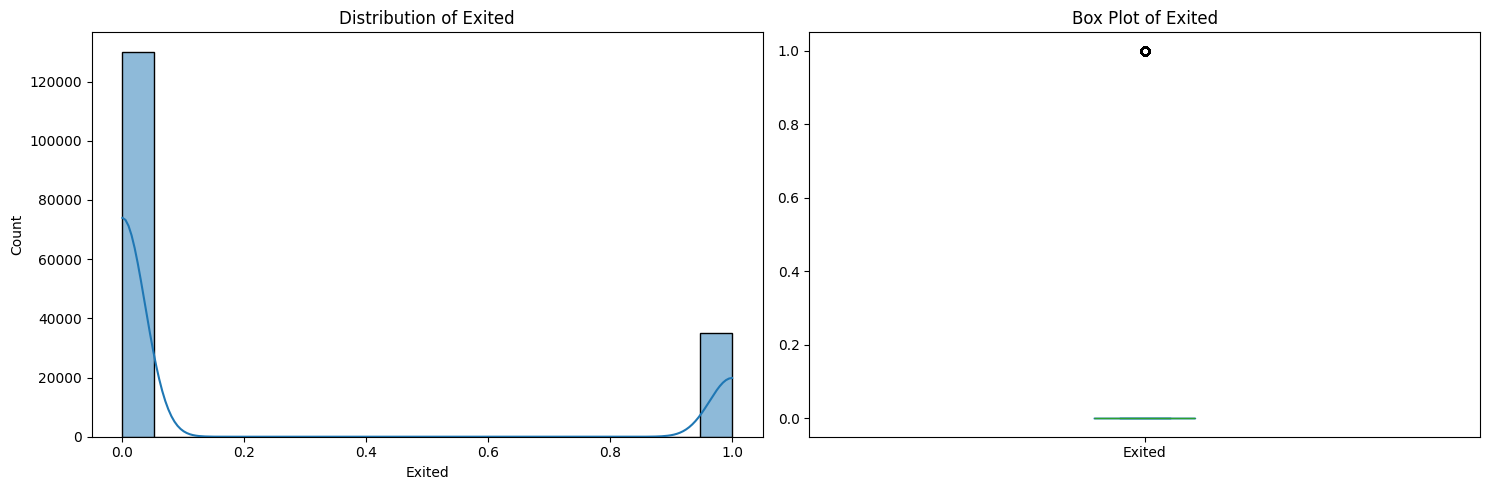

In [73]:
# Select only numerical columns using filtering
numerical_cols = bank_churn.select_dtypes(include=[np.number])

# Iterate through numerical columns
for col in numerical_cols:
    plt.figure(figsize=(15, 5))  # Set figure size once for all plots

    # Create subplots with 2 columns for distribution and box plot
    plt.subplot(121)
    sns.histplot(bank_churn[col], kde=True)
    plt.title(f"Distribution of {col}")

    plt.subplot(122)
    bank_churn[col].plot.box()
    plt.title(f"Box Plot of {col}")

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

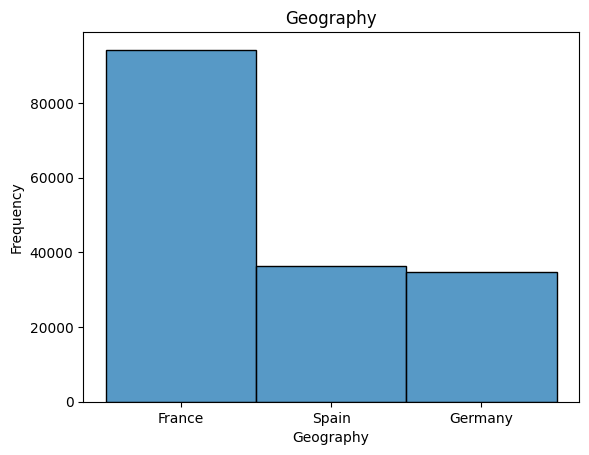

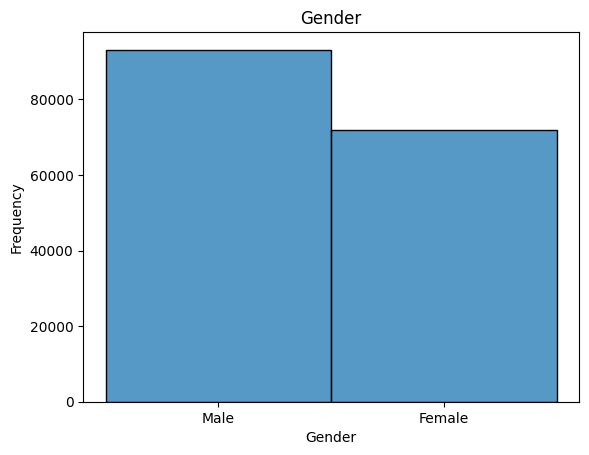

In [74]:
for i in  ['Geography', 'Gender']:
    plt.title(i)
    sns.histplot(bank_churn[i]).set(ylabel='Frequency')
    plt.show()

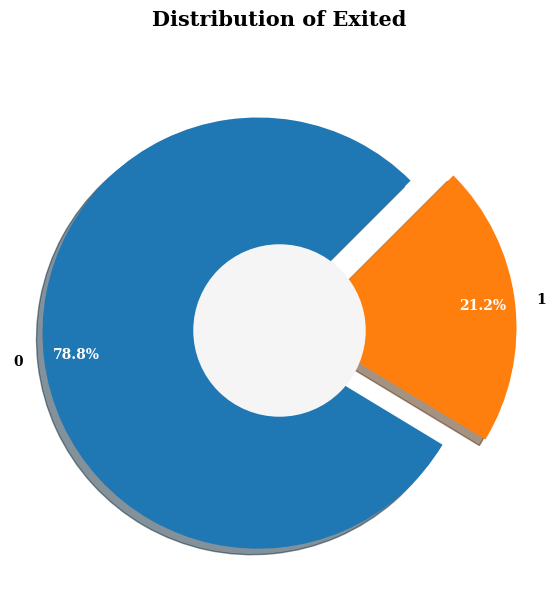

In [75]:
label_data = bank_churn['Exited'].value_counts()
explode = [0.1] * len(bank_churn['Exited'].value_counts())
plt.figure(figsize=(7, 7))  # background color
patches, texts, pcts = plt.pie(label_data,
labels=label_data.index,
                               pctdistance=0.85,
                               shadow=True,
                               startangle=45,
                               explode=explode,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 10,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white')
hfont = {'fontname': 'serif', 'weight': 'bold'}
plt.title('Distribution of Exited', size=15, **hfont, y=1.05)
centre_circle = plt.Circle((0, 0), 0.40, fc='#F5F5F5')  # circle's color
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

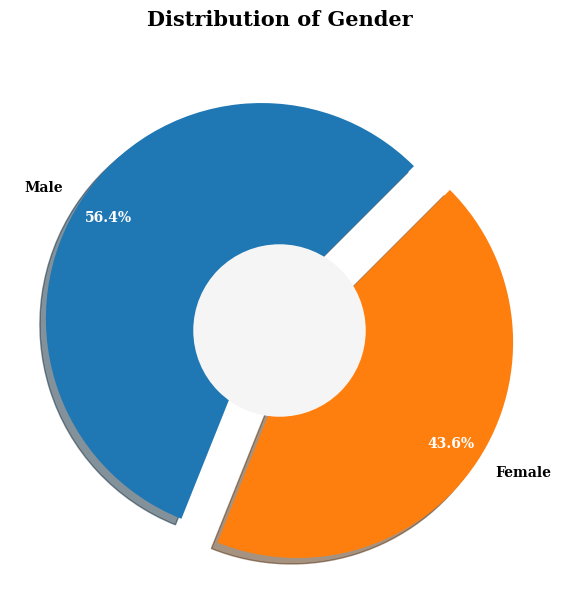

In [76]:
label_data = bank_churn['Gender'].value_counts()
explode = [0.1] * len(bank_churn['Gender'].value_counts())
plt.figure(figsize=(7, 7))  # background color
patches, texts, pcts = plt.pie(label_data,
labels=label_data.index,
                               pctdistance=0.85,
                               shadow=True,
                               startangle=45,
                               explode=explode,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 10,
                                          'color': 'black',
                                          'weight': 'bold',
                                          'family': 'serif'})
plt.setp(pcts, color='white')
hfont = {'fontname': 'serif', 'weight': 'bold'}
plt.title('Distribution of Gender', size=15, **hfont, y=1.05)
centre_circle = plt.Circle((0, 0), 0.40, fc='#F5F5F5')  # circle's color
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

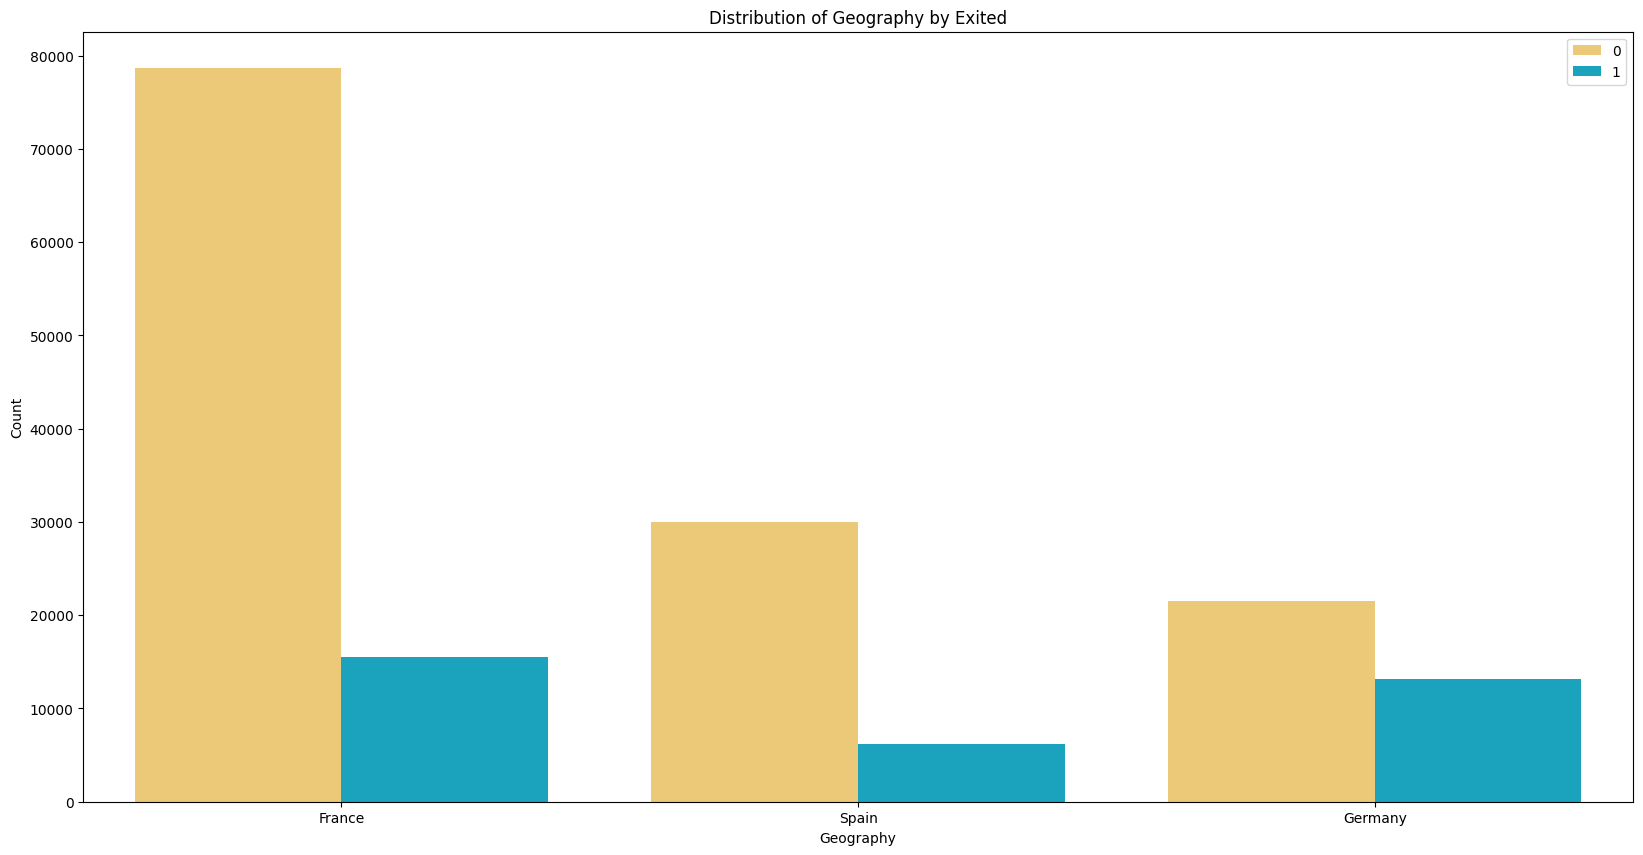

In [77]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Geography', hue='Exited', data=bank_churn, palette=["#ffd166", "#00b4d8"])
plt.title('Distribution of Geography by Exited')
plt.legend(loc=1)
plt.xlabel('Geography')
plt.ylabel('Count');

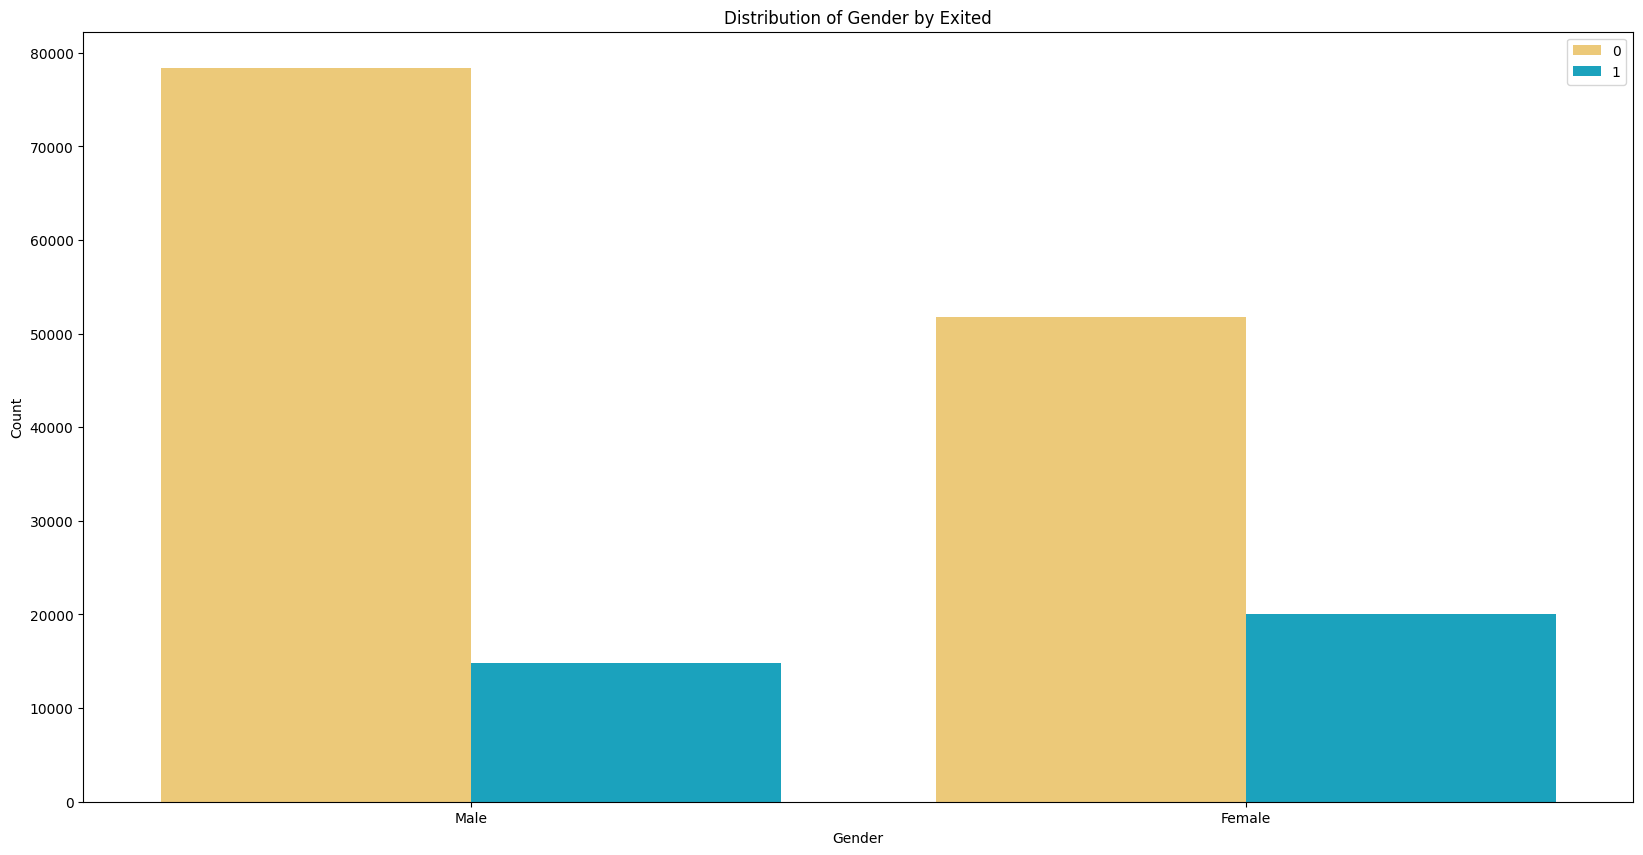

In [78]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Gender', hue='Exited', data=bank_churn, palette=["#ffd166", "#00b4d8"])
plt.title('Distribution of Gender by Exited')
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Count');

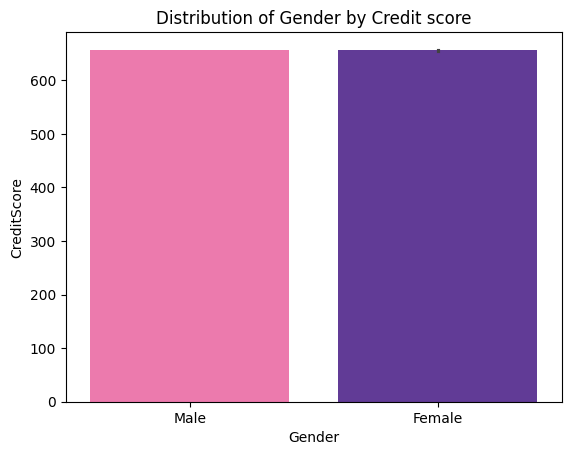

In [79]:
#plt.figure(figsize=(12, 8))
sns.barplot( x='Gender', y='CreditScore', data=bank_churn, palette=["#ff67ab", "#5e2ca5"])
plt.title('Distribution of Gender by Credit score');


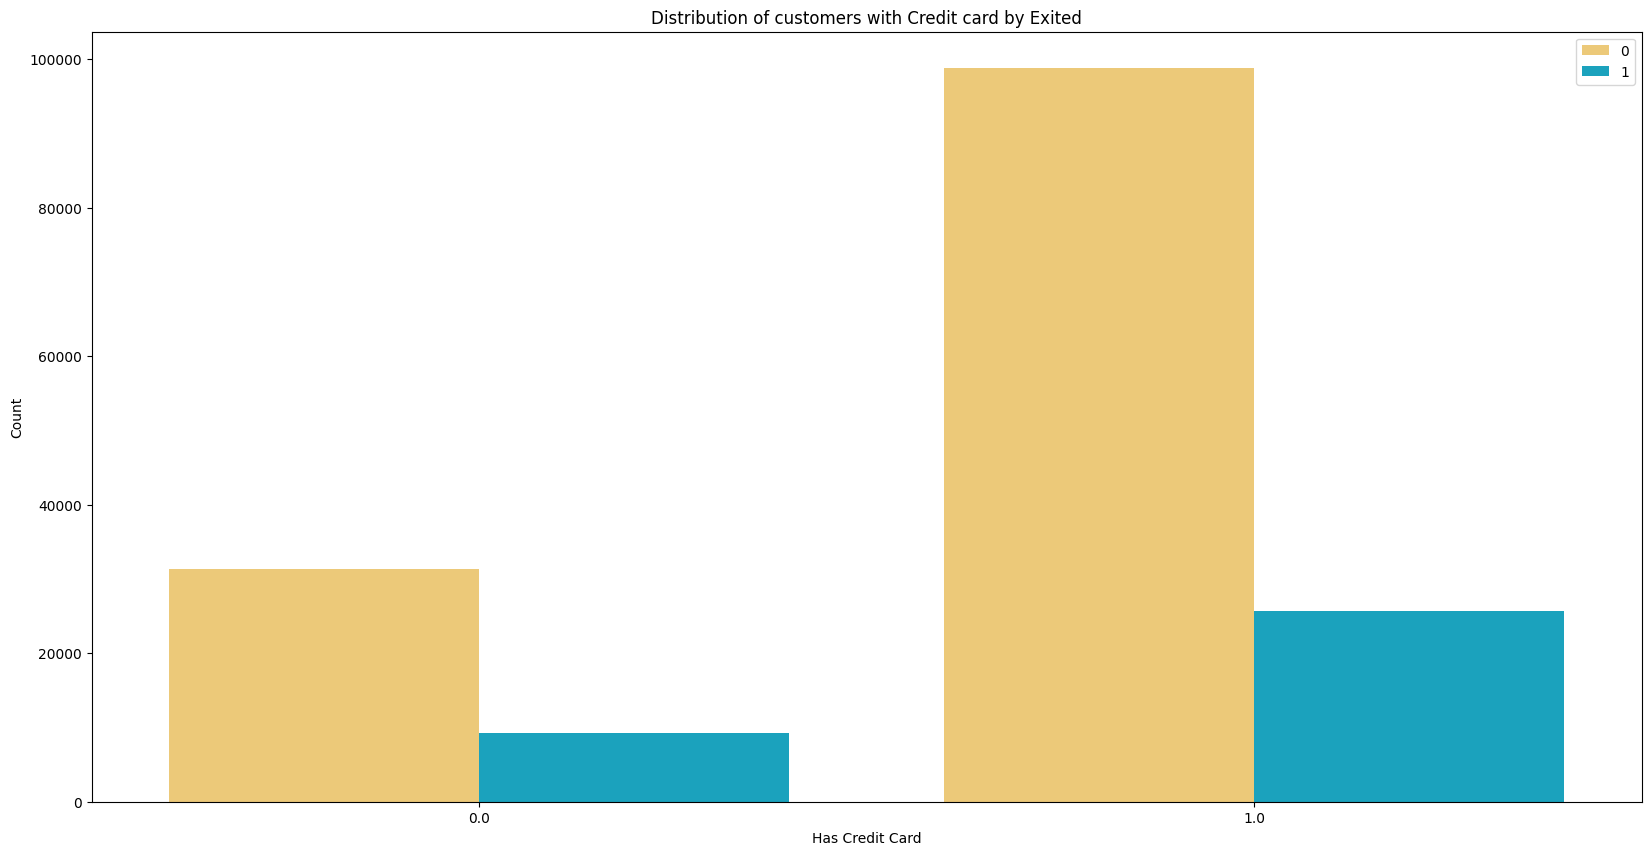

In [80]:
plt.figure(figsize=(20, 10))
sns.countplot(x='HasCrCard', hue='Exited', data=bank_churn, palette=["#ffd166", "#00b4d8"])
plt.title('Distribution of customers with Credit card by Exited')
plt.legend(loc=1)
plt.xlabel('Has Credit Card')
plt.ylabel('Count');

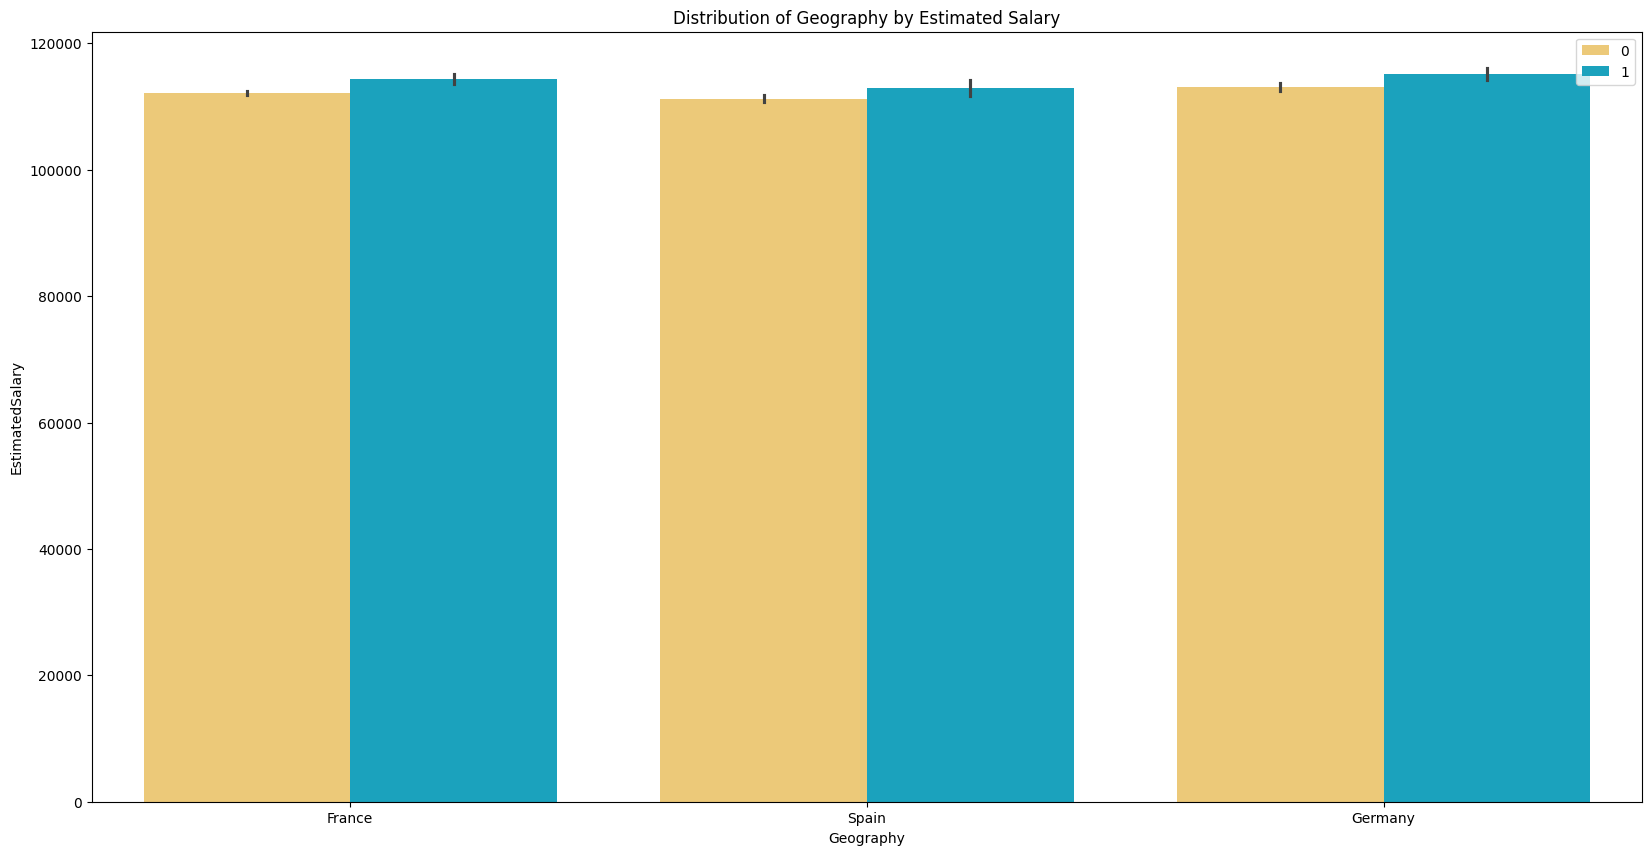

In [81]:
plt.figure(figsize=(20, 10))
sns.barplot( x='Geography', y='EstimatedSalary', hue='Exited', data=bank_churn, palette=["#ffd166", "#00b4d8"])
plt.title('Distribution of Geography by Estimated Salary')
plt.legend(loc=1)
plt.xlabel('Geography')
plt.ylabel('EstimatedSalary');

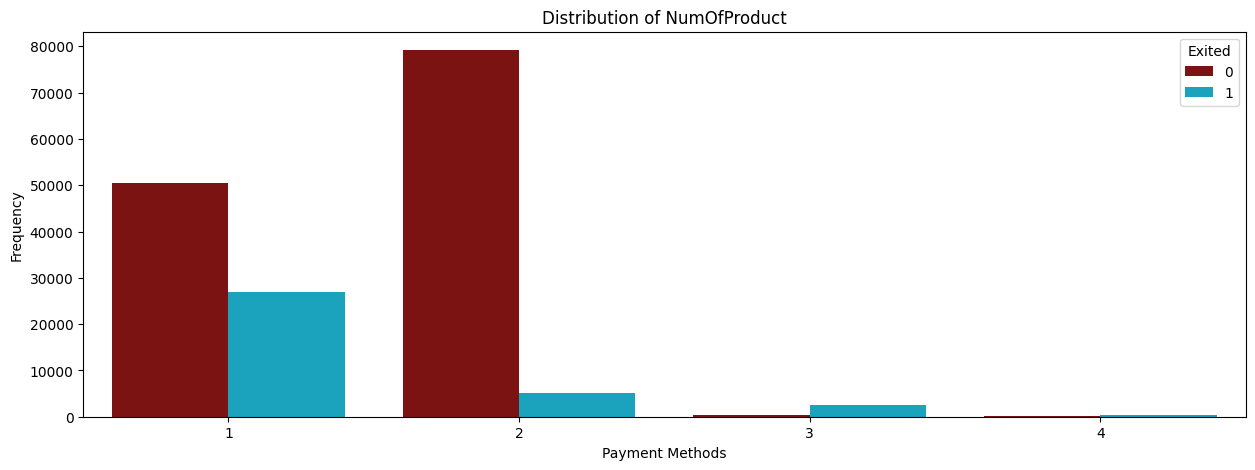

In [82]:
plt.figure(figsize=(15, 5))
sns.countplot(data=bank_churn, x='NumOfProducts', hue='Exited', palette=['#8e0201', "#00b4d8"])
plt.title('Distribution of NumOfProduct')
plt.xlabel('Payment Methods')
plt.ylabel('Frequency')
plt.show();

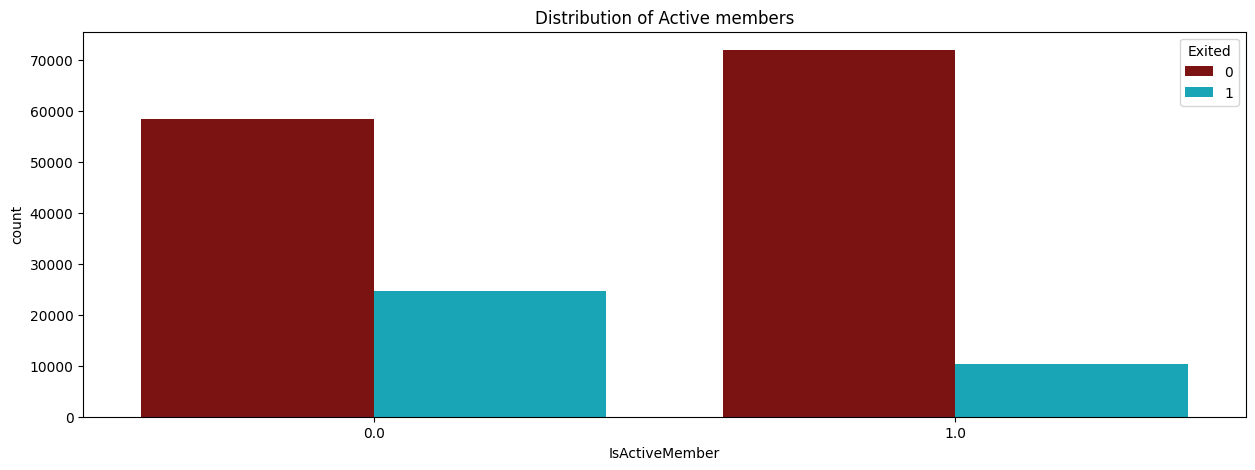

In [83]:
plt.figure(figsize=(15, 5))
sns.countplot(data=bank_churn, x='IsActiveMember', hue='Exited', palette=['#8e0201', "#00b9d1"])
plt.title('Distribution of Active members')
plt.show();

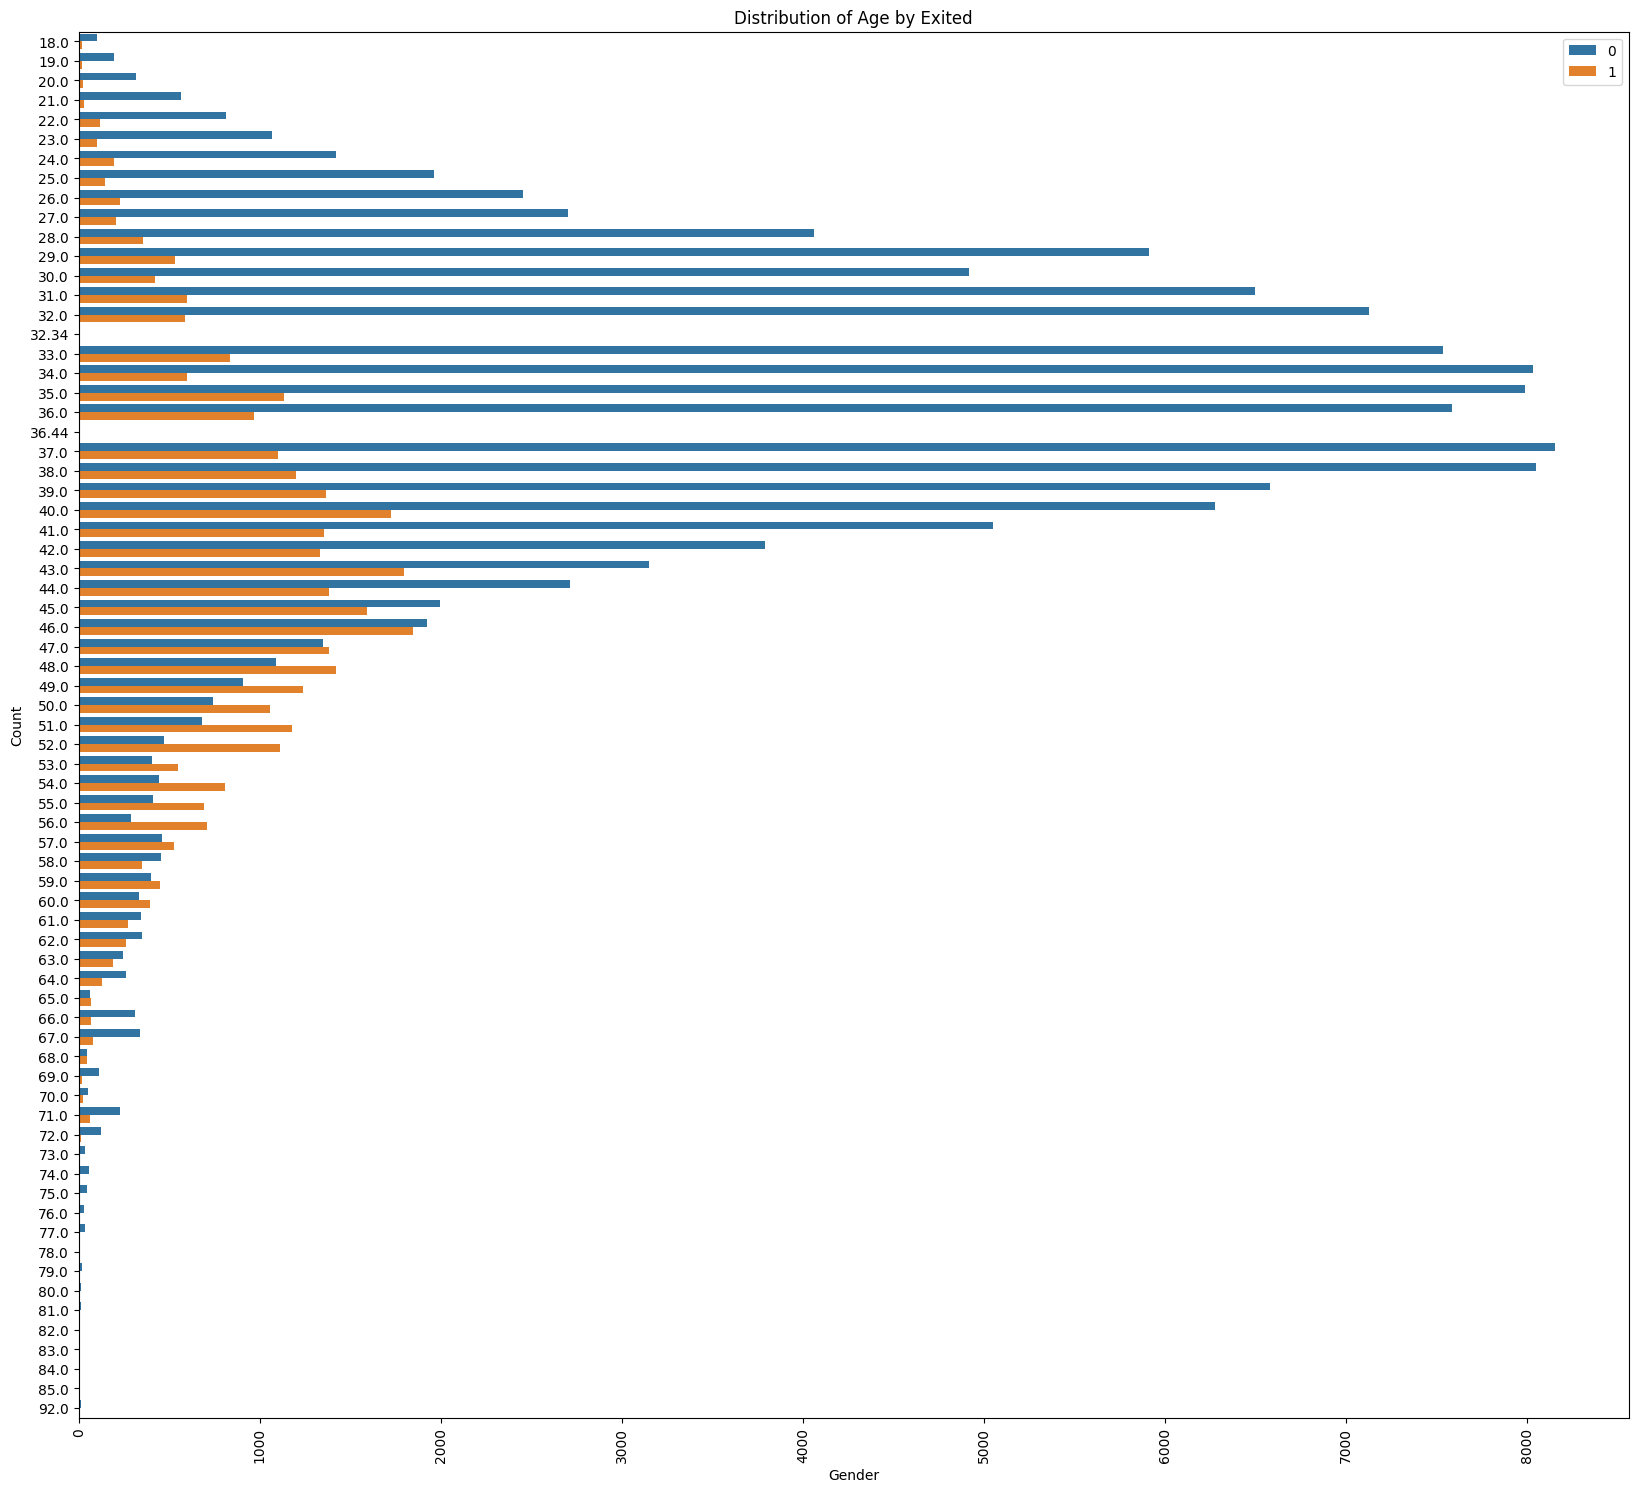

In [84]:
plt.figure(figsize=(20, 18))
sns.countplot(y='Age', hue='Exited', data=bank_churn)
plt.title('Distribution of Age by Exited')
plt.legend(loc=1)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [85]:
bank_churn.select_dtypes(include=np.number).columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

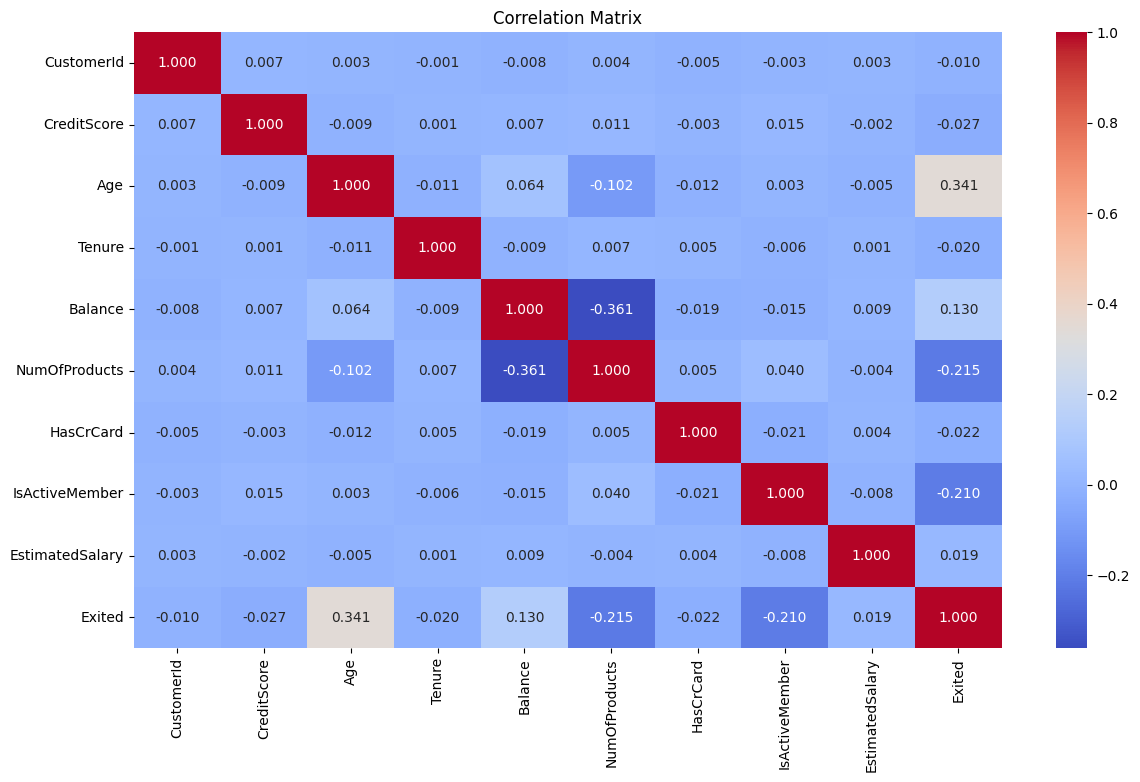

In [86]:
plt.figure(figsize=(14, 8))
correlation_matrix = bank_churn[bank_churn.select_dtypes(include=np.number).columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix')
plt.show();

data preprocessing

In [87]:
bank_churn.drop(columns=["CustomerId","Surname"],inplace = True)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, f1_score, fbeta_score, recall_score, precision_score, 
                            classification_report, roc_auc_score, confusion_matrix, auc)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer

In [89]:
for i in bank_churn.select_dtypes(exclude=np.number):
    print(bank_churn[i].value_counts());print(50*'*')

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64
**************************************************
Gender
Male      93150
Female    71884
Name: count, dtype: int64
**************************************************


In [90]:
# bank_churn = pd.get_dummies(bank_churn, columns=['Geography', 'Gender'], dtype=int)

In [91]:
X = bank_churn.drop('Exited', axis=1)
y = bank_churn['Exited']

def transform_data(input_df):
    """
    Transform the input dataset.

    Parameters:
    - input_df (pd.DataFrame): The input dataset.

    Returns:
    - X_transformed (pd.DataFrame): Transformed features.
    """

    # Define numeric and categorical columns
    num_cols = list(input_df.select_dtypes(include=np.number).columns)
    cat_cols = list(input_df.select_dtypes(exclude=np.number).columns)

    # Create transformers for numeric and categorical features
    num_transformer = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    cat_transformer = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('target_encode', TargetEncoder(handle_unknown='value'))
    ])

    # Use ColumnTransformer to handle both numerical and categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_cols),
            ('cat', cat_transformer, cat_cols)
        ]
    )

    # Create a full pipeline with the preprocessor
    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor)
    ])

    # Fit and transform on the entire dataset
    X_transformed = full_pipeline.fit_transform(input_df, y)

    # Retrieve feature names after applying ColumnTransformer
    cat_feature_names = full_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['target_encode'].get_feature_names_out(cat_cols)

    # If cat_feature_names contains integers, create names manually
    if isinstance(cat_feature_names[0], int):  # Check if the first element is an integer
        feature_names = num_cols + cat_cols  # Use original categorical column names
    else:
        feature_names = num_cols + [name.split("_")[0] for name in cat_feature_names]

    # Create DataFrame with correct column names and original data types for numerical features
    X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)
    X_transformed_df[num_cols] = input_df[num_cols]

    return X_transformed_df

X = transform_data(X)

In [92]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0.165282,0.159055
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0.165282,0.159055
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0.165282,0.159055
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0.165282,0.159055
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0.172176,0.159055


In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify =y,
    random_state=42
)

In [94]:
# train a dummy classifier
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
dummy_clf.fit(X_train, y_train)
# generate predictions
y_pred_dummy = dummy_clf.predict(X_test)

In [95]:
print(classification_report(y_test, y_pred_dummy))

              precision    recall  f1-score   support

           0       0.79      0.50      0.61     32529
           1       0.21      0.51      0.30      8730

    accuracy                           0.50     41259
   macro avg       0.50      0.50      0.46     41259
weighted avg       0.67      0.50      0.55     41259



In [96]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score

# from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, rand
import random
import sys
from tqdm import tqdm

import warnings;warnings.filterwarnings(action='ignore')

In [97]:
model = xgb.XGBClassifier(random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [98]:
# generate predictions
y_pred_xgb = model.predict(X_test)

In [99]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     32529
           1       0.74      0.56      0.64      8730

    accuracy                           0.86     41259
   macro avg       0.81      0.75      0.78     41259
weighted avg       0.86      0.86      0.86     41259



In [100]:
y.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

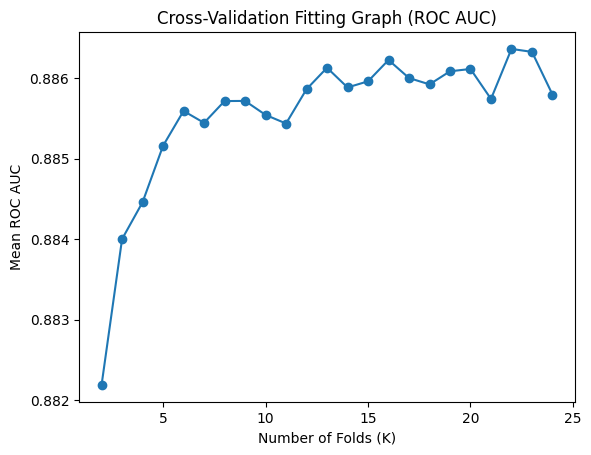

Best K value based on ROC AUC: 22


In [101]:
# Set up K values and performance tracking
k_values = np.arange(2, 25)
performance_scores = []

skf_seed = 42
model = xgb.XGBClassifier(eval_metric='auc', objective='binary:logistic', random_state=skf_seed)
performance_scores = [
    np.mean(cross_val_score(model, X_train, y_train, cv=StratifiedKFold(n_splits=k, shuffle=True, random_state=skf_seed), scoring='roc_auc'))
    for k in k_values
]

# Find the best K value and score
best_k = k_values[np.argmax(performance_scores)]
best_score = performance_scores[np.argmax(performance_scores)]

# Visualize results
plt.plot(k_values, performance_scores, marker='o')
plt.title('Cross-Validation Fitting Graph (ROC AUC)')
plt.xlabel('Number of Folds (K)')
plt.ylabel('Mean ROC AUC')
plt.show()

print("Best K value based on ROC AUC:", best_k)

In [102]:
print(performance_scores)

[0.882187396595137, 0.8839993587935092, 0.8844570910739097, 0.8851583380499871, 0.8855910495299463, 0.8854433274928132, 0.8857137817707244, 0.8857157951059936, 0.8855422282472979, 0.8854350734807284, 0.8858611864812712, 0.8861279174560195, 0.885883181797748, 0.8859592448530209, 0.8862241120345254, 0.886000089947587, 0.8859211971024711, 0.8860838085928509, 0.8861125642514907, 0.8857400999047675, 0.8863617151457862, 0.8863248244716387, 0.8857949335323507]


In [103]:
y.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [104]:
y.value_counts().values[0] / y.value_counts().values[1]

3.72592422897397

In [105]:
params = {
    'n_estimators': 1500,
    'eta': 0.03,
    'subsample': 0.6,
    'colsample_bytree': 0.6,
    'gamma': 20,
    'min_child_weight': 200,
    'lambda': 0.1,
    'alpha': 0.1,
    'scale_pos_weight': y.value_counts().values[0] / y.value_counts().values[1]
}
print(params)

{'n_estimators': 1500, 'eta': 0.03, 'subsample': 0.6, 'colsample_bytree': 0.6, 'gamma': 20, 'min_child_weight': 200, 'lambda': 0.1, 'alpha': 0.1, 'scale_pos_weight': 3.72592422897397}


In [106]:
skf = StratifiedKFold(n_splits=best_k, shuffle=True, random_state=42)
cross_val_score(xgb.XGBClassifier(**params), X_train, y_train, cv=skf, scoring='roc_auc')

array([0.88936722, 0.89944421, 0.88667514, 0.88682443, 0.88451757,
       0.89361777, 0.87453259, 0.89202786, 0.8912615 , 0.89101993,
       0.89013136, 0.88766917, 0.88562942, 0.88735897, 0.90375632,
       0.88328468, 0.89169562, 0.89703325, 0.88511652, 0.88828322,
       0.8866071 , 0.88318096])

In [107]:
scores = cross_val_score(xgb.XGBClassifier(**params), X_train, y_train, cv=skf, scoring='roc_auc')

In [108]:
np.mean(scores)

0.8890470364954495

In [109]:
np.std(scores)

0.005965394377809948

In [110]:
%%time

train = xgb.DMatrix(X_train, y_train)
val = xgb.DMatrix(X_test, y_test)

model = xgb.train(params=params, dtrain=train, evals=[(val, 'validation')], verbose_eval=False)

CPU times: total: 1.28 s
Wall time: 486 ms


In [111]:
test = xgb.DMatrix(X_test)
predictions_probabilities = model.predict(test)

# Convert probabilities to binary labels (0 or 1)
predicted_labels = (predictions_probabilities >= 0.5).astype(int)
predicted_labels

array([1, 0, 1, ..., 1, 0, 1])

In [112]:
accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)
report = classification_report(y_test, predicted_labels)
auc_score = roc_auc_score(y_test, predicted_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC Score:", auc_score)
print("Classification Report:\n", report)

Accuracy: 0.7965050049686129
Precision: 0.5121915608117974
Recall: 0.8036655211912944
F1-Score: 0.6256465132869627
AUC Score: 0.7991244080486891
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86     32529
           1       0.51      0.80      0.63      8730

    accuracy                           0.80     41259
   macro avg       0.73      0.80      0.74     41259
weighted avg       0.85      0.80      0.81     41259



In [113]:
y_pred_list = []

skf = StratifiedKFold(n_splits=best_k, shuffle=True, random_state=42)
for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Convert data to DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train_fold, label=y_train_fold)
    dval = xgb.DMatrix(X_val_fold, label=y_val_fold)
    dtest = xgb.DMatrix(X_test)

    # Create and train the XGBoost model
    xgb_model = xgb.train(
        params,
        dtrain,
        evals=[(dval, 'eval')],
        verbose_eval=False,
        # early_stopping_rounds=early_stopping_rounds
    )

    # Predict on the test set
    y_pred_fold = xgb_model.predict(dtest)
    y_pred_list.append(y_pred_fold)
    # Average predictions across folds
    y_pred_avg = np.mean(y_pred_list, axis=0)

In [114]:
y_pred_list

[array([0.536415  , 0.45842168, 0.54040927, ..., 0.57823867, 0.40122437,
        0.5305074 ], dtype=float32),
 array([0.53632706, 0.45526853, 0.5386697 , ..., 0.57741046, 0.40199813,
        0.53515655], dtype=float32),
 array([0.52856666, 0.45629528, 0.54111505, ..., 0.5781662 , 0.40133378,
        0.5381307 ], dtype=float32),
 array([0.5352587 , 0.45735866, 0.5402343 , ..., 0.57803607, 0.4007036 ,
        0.5386106 ], dtype=float32),
 array([0.5351673 , 0.4574882 , 0.5413946 , ..., 0.57751185, 0.4014054 ,
        0.5387355 ], dtype=float32),
 array([0.53309   , 0.45954317, 0.53887486, ..., 0.5785182 , 0.40094846,
        0.53137136], dtype=float32),
 array([0.5353342 , 0.45523372, 0.5393334 , ..., 0.57822084, 0.4022623 ,
        0.52994543], dtype=float32),
 array([0.53374267, 0.4562066 , 0.5424415 , ..., 0.57801914, 0.4026066 ,
        0.5317633 ], dtype=float32),
 array([0.53419614, 0.45743978, 0.5405843 , ..., 0.57801294, 0.40091616,
        0.5310956 ], dtype=float32),
 array([0.